# From Harris & Wolpert (1998)

## Create a single-output discrete time system under control with a state-update equation

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N_time = 500
N_trial = 100
time = np.linspace(0, .1, N_time) # in s
dt = time[1] - time[0]
fps = 1/dt

In [3]:
def model(time, U, tau_x, tau_v, sigma_k):
    X = np.zeros_like(U) # position
    V = np.zeros_like(U) # vitesse
    dt = time[1] - time[0]
    for i_t, t in enumerate(time[1:]):
        V[i_t+1] = (1 - dt/tau_v)*V[i_t] + (U[i_t] +  sigma_k*(U[i_t]**2) * np.random.randn()) *dt
        X[i_t+1] = (1 - dt/tau_x)*X[i_t] + V[i_t]*dt 
    return X

def modeling(time, U, tau_x=.224, tau_v=.013, sigma_k=1.e-3, N_trial=100):
    X = np.zeros((time.shape[0], N_trial)) # position
    for i_trial in range(N_trial):
        X[:, i_trial] = model(time, U, tau_x=tau_x, tau_v=tau_v, sigma_k=sigma_k)
    return X.mean(axis=1), X.std(axis=1)


In [4]:
# BANG BANG

def banbang(time, U_0=2000, t1=0., t2=0.06, t3=0., t4=0.005, U_off=.2):
    U = np.zeros((N_time))  # Neural command system 
    t_on =t2/2+t1
    d_on = t2
    U[ np.abs(time - t_on)  < d_on/2 ] = U_0
    t_off = t1 + t2 + t3+t4/2
    d_off = t4
    U[ np.abs(time - t_off)  < d_off/2 ] = - U_off * U_0
    return U

U= banbang(time)

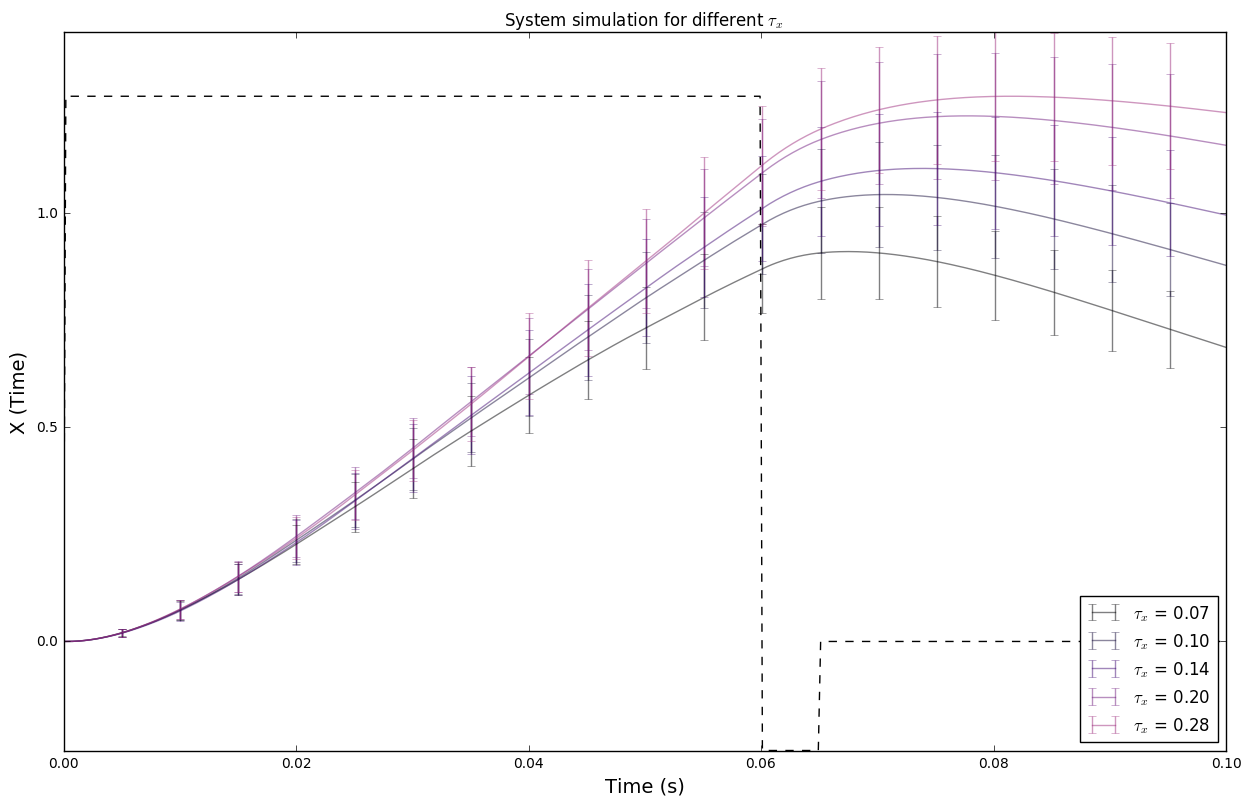

In [5]:
tau_x = .224
taus = tau_x * np.logspace(-.5, .1, num=5)
N_tau = len(taus)
X = np.zeros((N_tau, N_time))
X_std = np.zeros((N_tau, N_time))
W = np.zeros((N_tau, N_time))

fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
from cycler import cycler
ax.set_prop_cycle(cycler('color', [plt.cm.magma(h) for h in np.linspace(0, 1, len(taus)*2)]))
X_max = 0
for i_tau, tau_x in enumerate(taus):
    X[i_tau, :], X_std[i_tau, :] = modeling(time, U, tau_x=tau_x)
    ax.errorbar(time, y=X[i_tau, :], yerr=X_std[i_tau, :], alpha=.5, lw=1, label=r'$\tau_x$ = %.2f' % tau_x, errorevery=N_time/20)
    X_max = max((X_max, X[i_tau, :].max()))
ax.plot(time, U/U.max()*X_max, '--k')

ax.set_title(r'System simulation for different $\tau_x$ ')
ax.set_xlabel('Time (s)', fontsize=14)
ax.set_ylabel('X (Time)', fontsize=14)
ax.axis('tight')

_ = ax.legend(loc='lower right')


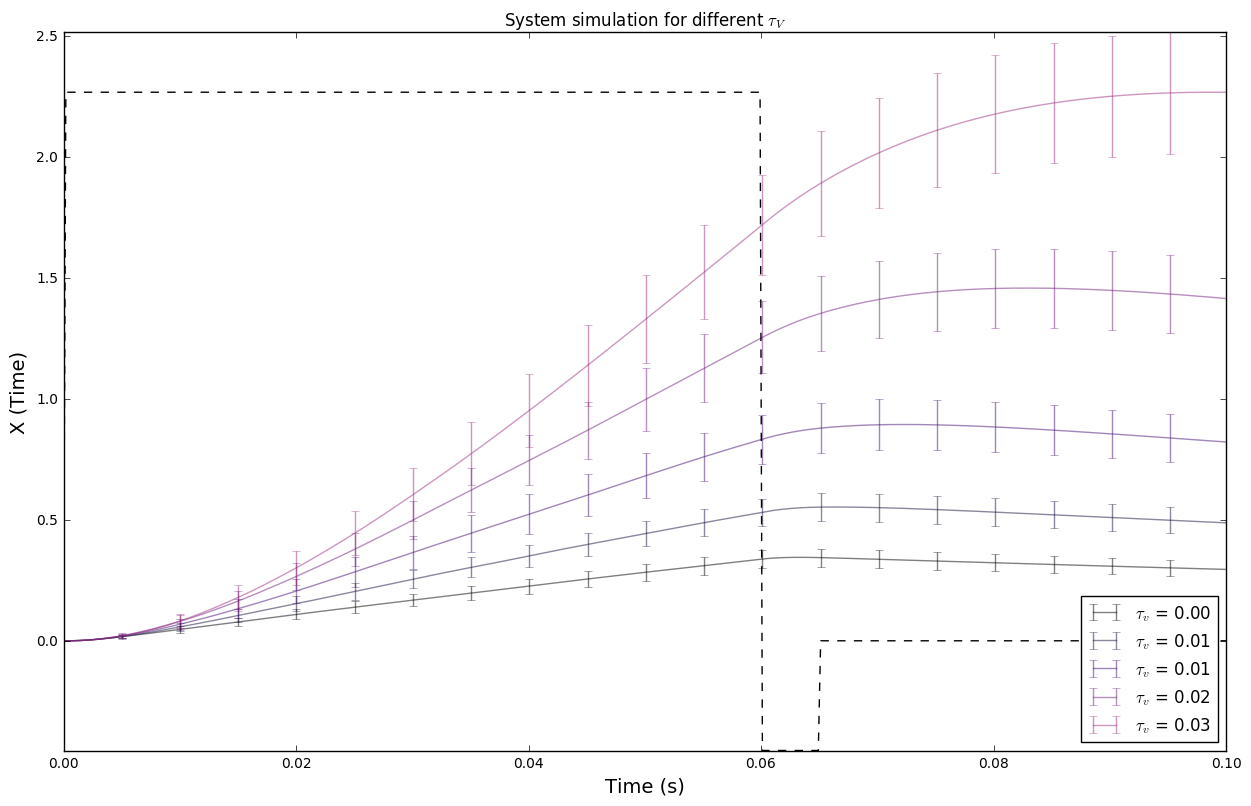

In [6]:
tau_v = .013
taus = tau_v * np.logspace(-.6, .3, num=5)
N_tau = len(taus)
X = np.zeros((N_tau, N_time))
X_std = np.zeros((N_tau, N_time))
W = np.zeros((N_tau, N_time))

fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
from cycler import cycler
ax.set_prop_cycle(cycler('color', [plt.cm.magma(h) for h in np.linspace(0, 1, len(taus)*2)]))
X_max = 0
for i_tau, tau_v in enumerate(taus):
    X[i_tau, :], X_std[i_tau, :] = modeling(time, U, tau_v=tau_v)
    ax.errorbar(time, y=X[i_tau, :], yerr=X_std[i_tau, :], alpha=.5, lw=1, label=r'$\tau_v$ = %.2f' % tau_v, errorevery=N_time/20)
    X_max = max((X_max, X[i_tau, :].max()))
ax.plot(time, U/U.max()*X_max, '--k')

ax.set_title(r'System simulation for different $\tau_V$ ')
ax.set_xlabel('Time (s)', fontsize=14)
ax.set_ylabel('X (Time)', fontsize=14)
ax.axis('tight')

_ = ax.legend(loc='lower right')


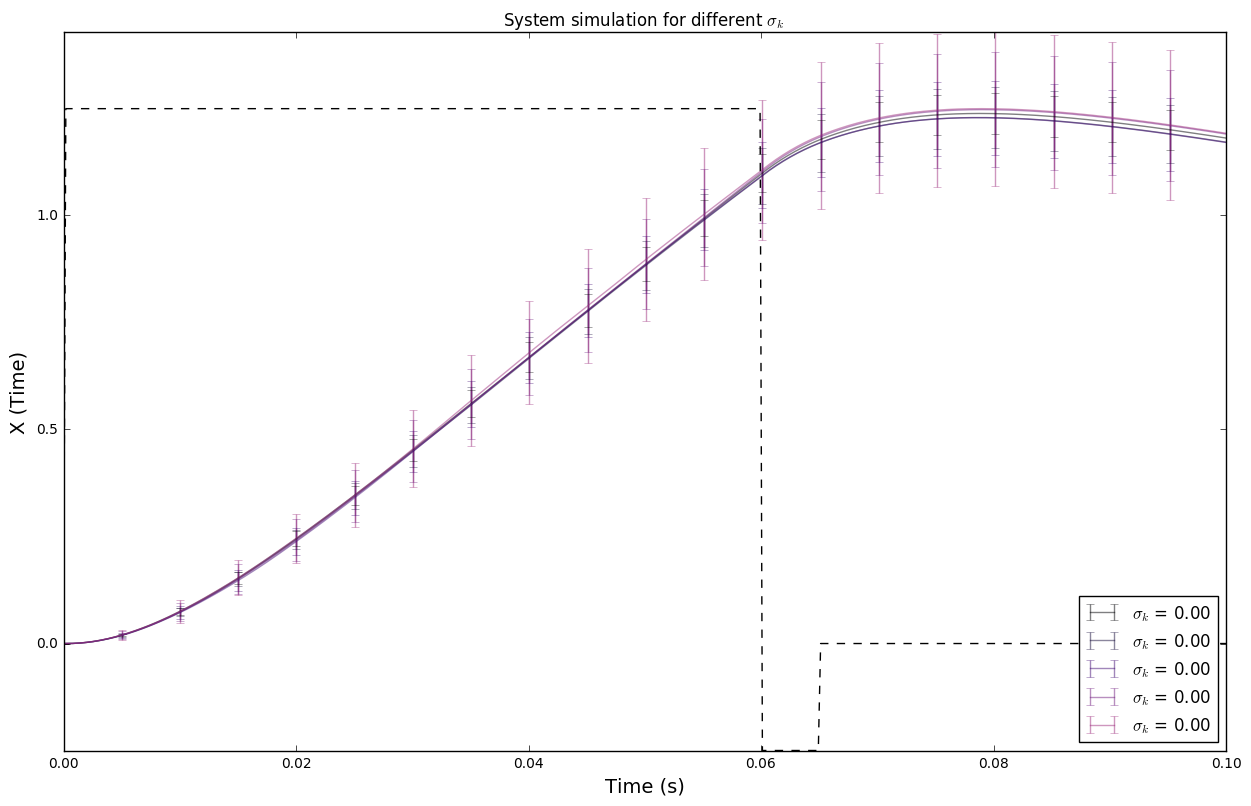

In [7]:
sigma_k = 1.e-3
sigma_ks = sigma_k * np.logspace(-.5, .1, num=5)

X = np.zeros((N_tau, N_time))
X_std = np.zeros((N_tau, N_time))
W = np.zeros((N_tau, N_time))

fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
from cycler import cycler
ax.set_prop_cycle(cycler('color', [plt.cm.magma(h) for h in np.linspace(0, 1, len(taus)*2)]))
X_max = 0
for i_sigma_k, sigma_k in enumerate(sigma_ks):
    X[i_sigma_k, :], X_std[i_sigma_k, :] = modeling(time, U, sigma_k=sigma_k)
    ax.errorbar(time, y=X[i_sigma_k, :], yerr=X_std[i_sigma_k, :], 
                alpha=.5, lw=1, label=r'$\sigma_k$ = %.2f' % sigma_k, errorevery=N_time/20)
    X_max = max((X_max, X[i_sigma_k, :].max()))
ax.plot(time, U/U.max()*X_max, '--k')

ax.set_title(r'System simulation for different $\sigma_k$ ')
ax.set_xlabel('Time (s)', fontsize=14)
ax.set_ylabel('X (Time)', fontsize=14)
#ax.set_xlim(0, 150)
ax.axis('tight')

_ = ax.legend(loc='lower right')
